In [48]:
#Import some libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns
import os
sb.set_style('darkgrid')
rcParams['figure.figsize'] = 8,8
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

> Data Preprocessing

In [92]:
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.pipeline import FeatureUnion, make_pipeline, Pipeline
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_predict, cross_val_score, GridSearchCV,RandomizedSearchCV

> > Project packages

In [71]:
from project_package.data_package import data
from project_package.model_package import model, model_metrics
from project_package.plot_package import bi_plot, uni_plot
from sklearn.ensemble import IsolationForest

In [24]:
# ?KNNImputer

> Load Datasets

In [25]:
#import data
train = pd.read_csv('../datasets/AIMS_Train.csv')
test=  pd.read_csv('../datasets/AIMS_Test.csv')
submission = pd.read_csv('../datasets/AIMS_SampleSubmission.csv')
variables = pd.read_csv('../datasets/VariableDefinitions.csv')

In [26]:
variables

,Variable Definitions,Unnamed: 1,Unnamed: 2
0,NaN,French,English
1,NaN,Le dataset churn comprend 19 variables dont 15...,The churn dataset includes 19 variables includ...
2,user_id,NaN,NaN
3,REGION,la localité de chaque client,the location of each client
4,TENURE,la durée dans le reseau,duration in the network
5,MONTANT,montant de recharge,top-up amount
6,FREQUENCE_RECH,nombre de fois que le client a fait une recharge,number of times the customer refilled
7,REVENUE,revenu mensuel de chaque client,monthly income of each client
8,ARPU_SEGMENT,revenu sur 90 jours/3,income over 90 days / 3
9,FREQUENCE,nombre de fois que client à fait un revenu,number of times the client has made an income


In [27]:
train.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,51d5367a58953904c14238c4dd7393f5c4fd0a88,MATAM,K > 24 month,1000.0,1.0,990.0,330.0,1.0,97.0,1.0,NaN,NaN,NaN,NaN,NO,22,"Data:1000F=2GB,30d",1.0,0
1,3322a4900689f7f3cb14b8f9ea00778853f02d75,DIOURBEL,K > 24 month,NaN,NaN,NaN,NaN,NaN,223.0,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,0
2,3b00ec4bfcc855c6f39b14a722e47ec6d15607e7,DAKAR,K > 24 month,700.0,5.0,1010.0,337.0,7.0,566.0,1.0,3.0,15.0,0.0,NaN,NO,8,"Data: 100 F=40MB,24H",3.0,0
3,98c44b62c33c6a1d9dbcf5e918868419f249c4a8,LOUGA,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,3,NaN,NaN,0
4,18bd8c41ecb503a2d9137e3f70bc1caf146a266d,NaN,K > 24 month,3000.0,3.0,2995.0,998.0,3.0,NaN,NaN,33.0,NaN,NaN,NaN,NO,9,NaN,NaN,0


In [28]:
train.tail()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
646209,1c778c81cdcc43cb410db142935d1483367c24aa,KAOLACK,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN,0
646210,e13ff861de0ffd7a51084963634ccd027597511c,SAINT-LOUIS,K > 24 month,1500.0,3.0,1500.0,500.0,3.0,NaN,28.0,53.0,NaN,NaN,NaN,NO,32,MIXT:500F= 2500F on net _2500F off net;2d,2.0,0
646211,03ec81dadb13af0876d579a24a033ab27e7e2913,THIES,K > 24 month,13000.0,26.0,14000.0,4667.0,26.0,NaN,2973.0,183.0,50.0,NaN,NaN,NO,58,On-net 500F_FNF;3d,15.0,0
646212,c265e207e32f0573881ddcfa312022ee33372d4b,NaN,K > 24 month,3100.0,4.0,3033.0,1011.0,4.0,12905.0,NaN,0.0,NaN,NaN,NaN,NO,24,"Data:1000F=5GB,7d",3.0,0
646213,3fab267c587943cd2afedf8066b6a4b698220421,KOLDA,K > 24 month,6500.0,12.0,6500.0,2167.0,11.0,NaN,49.0,220.0,NaN,NaN,NaN,NO,57,All-net 500F =2000F_AllNet_Unlimited,13.0,0


In [29]:
train.shape

(646214, 19)

In [30]:
#view the data types in the train data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 646214 entries, 0 to 646213
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         646214 non-null  object 
 1   REGION          391246 non-null  object 
 2   TENURE          646214 non-null  object 
 3   MONTANT         419154 non-null  float64
 4   FREQUENCE_RECH  419154 non-null  float64
 5   REVENUE         428459 non-null  float64
 6   ARPU_SEGMENT    428459 non-null  float64
 7   FREQUENCE       428459 non-null  float64
 8   DATA_VOLUME     327544 non-null  float64
 9   ON_NET          409962 non-null  float64
 10  ORANGE          377516 non-null  float64
 11  TIGO            259060 non-null  float64
 12  ZONE1           50406 non-null   float64
 13  ZONE2           41072 non-null   float64
 14  MRG             646214 non-null  object 
 15  REGULARITY      646214 non-null  int64  
 16  TOP_PACK        375331 non-null  object 
 17  FREQ_TOP_P

In [31]:
test.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,c1b31e7cef249f2b777d934886b787a433029263,DAKAR,K > 24 month,10600.0,18.0,11099.0,3700.0,22.0,4004.0,60.0,123.0,19.0,NaN,NaN,NO,61,All-net 500F=2000F;5d,9.0
1,c205f3aff8486b0bed1051f3bf25fe04df7f671e,KAOLACK,K > 24 month,NaN,NaN,NaN,NaN,NaN,0.0,7.0,NaN,NaN,NaN,NaN,NO,6,NaN,NaN
2,d743faaf50bbc43e02a08a2c2f4326f6d368fb25,THIES,K > 24 month,17900.0,36.0,18405.0,6135.0,44.0,0.0,446.0,50.0,28.0,2.0,NaN,NO,62,On-net 1000F=10MilF;10d,9.0
3,c4e45ed21d5e2f64146b95fecbbb6b24740f803c,DAKAR,K > 24 month,10000.0,10.0,10001.0,3334.0,27.0,NaN,0.0,93.0,8.0,NaN,NaN,NO,45,All-net 500F=2000F;5d,12.0
4,96c6a822243654ae1fe5f5f887089681f806cb46,THIES,K > 24 month,500.0,1.0,500.0,167.0,1.0,NaN,8.0,14.0,NaN,NaN,NaN,NO,8,All-net 500F=2000F;5d,1.0


In [32]:
test.tail()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
114033,5716c645907ed2fc642414ce4072eddf284ede08,NaN,K > 24 month,200.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,5,NaN,NaN
114034,473fd291ae14644a757f86a76838820c1ddf7859,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,6,NaN,NaN
114035,e0457edfc3a4feafabe4108d89187390e85c64a9,DIOURBEL,K > 24 month,2200.0,2.0,3501.0,1167.0,4.0,7110.0,1.0,NaN,16.0,NaN,NaN,NO,59,"Data:1500F=SPPackage1,30d",2.0
114036,75f9e5ce36caef56d7c253e1cf92af68c1ece956,KAOLACK,K > 24 month,9800.0,21.0,9879.0,3293.0,21.0,18651.0,37.0,0.0,NaN,NaN,NaN,NO,61,"Data:490F=1GB,7d",15.0
114037,42e019de7bc1ae30bc617df9e2c1b8869c2420e6,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN


In [33]:
test.shape

(114038, 18)

In [34]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114038 entries, 0 to 114037
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         114038 non-null  object 
 1   REGION          69081 non-null   object 
 2   TENURE          114038 non-null  object 
 3   MONTANT         74135 non-null   float64
 4   FREQUENCE_RECH  74135 non-null   float64
 5   REVENUE         75854 non-null   float64
 6   ARPU_SEGMENT    75854 non-null   float64
 7   FREQUENCE       75854 non-null   float64
 8   DATA_VOLUME     58049 non-null   float64
 9   ON_NET          72436 non-null   float64
 10  ORANGE          66823 non-null   float64
 11  TIGO            45908 non-null   float64
 12  ZONE1           9011 non-null    float64
 13  ZONE2           7217 non-null    float64
 14  MRG             114038 non-null  object 
 15  REGULARITY      114038 non-null  int64  
 16  TOP_PACK        66425 non-null   object 
 17  FREQ_TOP_P

In [35]:
submission.head()

,user_id,CHURN
0,c1b31e7cef249f2b777d934886b787a433029263,0
1,c205f3aff8486b0bed1051f3bf25fe04df7f671e,0
2,d743faaf50bbc43e02a08a2c2f4326f6d368fb25,0
3,c4e45ed21d5e2f64146b95fecbbb6b24740f803c,0
4,96c6a822243654ae1fe5f5f887089681f806cb46,0


In [36]:
submission.shape

(114038, 2)

#### Data Wrangling

> rename columns to match english names

In [63]:
train.columns

Index(['user_id', 'REGION', 'TENURE', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE',
       'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO',
       'ZONE1', 'ZONE2', 'MRG', 'REGULARITY', 'TOP_PACK', 'FREQ_TOP_PACK',
       'CHURN'],
      dtype='object')

> Calcualte umber of leels in categorical variables

In [17]:
def check_levels(data, exclude_cols=[]):
    cat_cols = data.select_dtypes(include='object').columns.tolist()
    
    for col in cat_cols:
        if col not in exclude_cols:
            print('*-*'*10,'\n')
            print(data[col].value_counts())
            plt.figure(figsize=(10,5))
            plt.title(f"Value Counts of {col}", fontsize=15)
            data[col].value_counts(normalize=True).plot(kind='bar')
            print('*-*'*10,'\n')
            plt.ylabel('counts')
            plt.xlabel(col)

*-**-**-**-**-**-**-**-**-**-* 

DAKAR          154267
THIES           53902
SAINT-LOUIS     35882
LOUGA           29629
KAOLACK         29057
DIOURBEL        20083
TAMBACOUNDA     16449
KAFFRINE        13113
KOLDA           11511
FATICK          10676
MATAM            8755
ZIGUINCHOR       6664
SEDHIOU           972
KEDOUGOU          286
Name: REGION, dtype: int64
*-**-**-**-**-**-**-**-**-**-* 

*-**-**-**-**-**-**-**-**-**-* 

K > 24 month     613231
I 18-21 month     13412
H 15-18 month      7753
G 12-15 month      4372
J 21-24 month      3875
F 9-12 month       2805
E 6-9 month         557
D 3-6 month         209
Name: TENURE, dtype: int64
*-**-**-**-**-**-**-**-**-**-* 

*-**-**-**-**-**-**-**-**-**-* 

NO    646214
Name: MRG, dtype: int64
*-**-**-**-**-**-**-**-**-**-* 

*-**-**-**-**-**-**-**-**-**-* 

All-net 500F=2000F;5d             95425
On net 200F=Unlimited _call24H    45713
Data:490F=1GB,7d                  34513
Data: 100 F=40MB,24H              25538
Mixt 250F=Unlimite

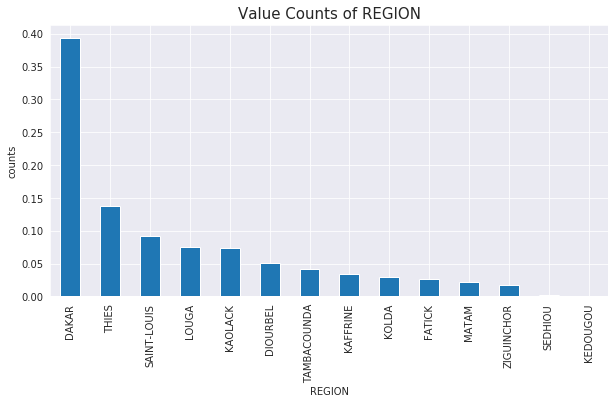

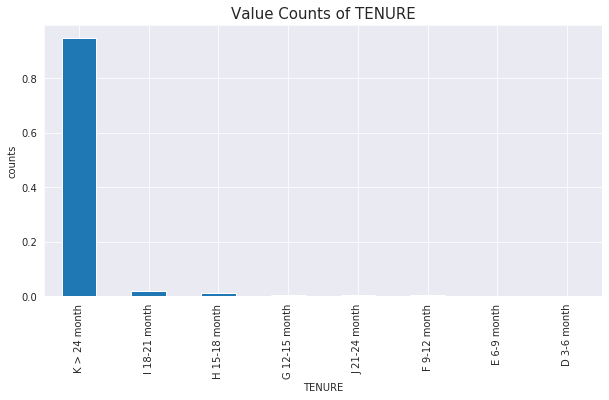

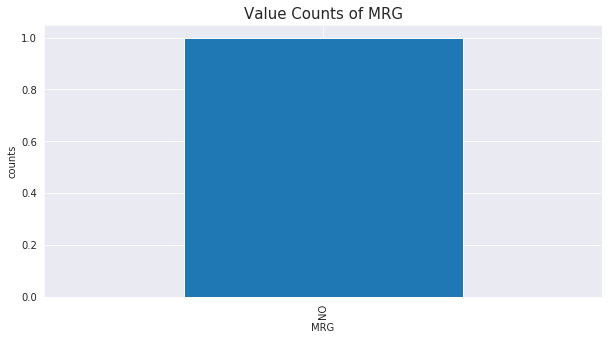

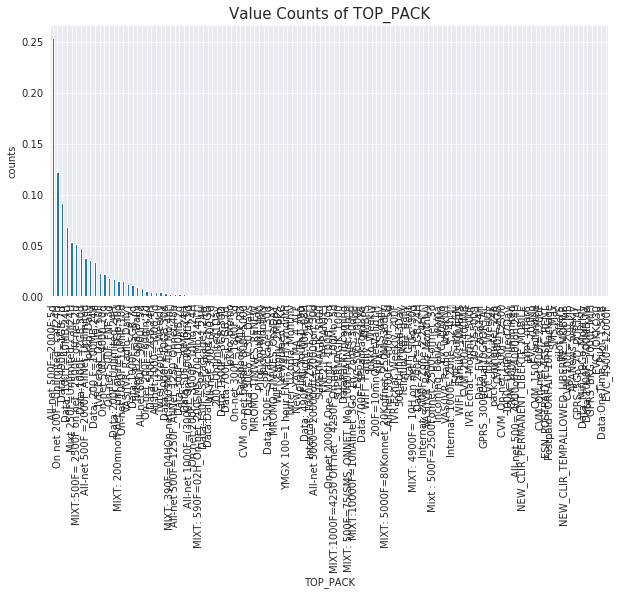

In [18]:
check_levels(train, exclude_cols=['user_id'])

Compute statistics for numerical variables

In [62]:
train.describe() 

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
count,419154.000000,419154.000000,428459.000000,428459.000000,428459.000000,3.275440e+05,409962.000000,377516.000000,259060.000000,50406.000000,41072.000000,646214.000000,375331.000000,646214.000000
mean,5535.843227,11.529891,5509.610712,1836.543270,13.975855,3.372705e+03,277.649655,95.274982,23.070601,7.987779,7.547478,28.038812,9.284301,0.187712
std,7161.605662,13.270572,7209.607287,2403.197321,14.689824,1.341078e+04,868.891990,202.764409,63.219602,39.546312,33.370589,22.282758,12.350381,0.390482
min,10.000000,1.000000,1.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,1000.000000,2.000000,1000.000000,333.000000,3.000000,0.000000e+00,5.000000,7.000000,2.000000,0.000000,0.000000,6.000000,2.000000,0.000000
50%,3000.000000,7.000000,3000.000000,1000.000000,9.000000,2.600000e+02,27.000000,29.000000,6.000000,1.000000,2.000000,24.000000,5.000000,0.000000
75%,7400.000000,16.000000,7382.000000,2461.000000,20.000000,2.875000e+03,157.000000,99.000000,20.000000,4.000000,5.000000,51.000000,12.000000,0.000000
max,290500.000000,132.000000,397968.000000,132656.000000,91.000000,1.823866e+06,36687.000000,6721.000000,4174.000000,1867.000000,1796.000000,62.000000,629.000000,1.000000


> Check for null values

In [20]:
def check_null(data, plot=True):
    print(data.isnull().sum())
    if plot:
        plt.figure(figsize=(10,5))
        plt.title(f"Null Values Count", fontsize=15)
        data.isnull().sum().plot.bar()

user_id                0
REGION            254968
TENURE                 0
MONTANT           227060
FREQUENCE_RECH    227060
REVENUE           217755
ARPU_SEGMENT      217755
FREQUENCE         217755
DATA_VOLUME       318670
ON_NET            236252
ORANGE            268698
TIGO              387154
ZONE1             595808
ZONE2             605142
MRG                    0
REGULARITY             0
TOP_PACK          270883
FREQ_TOP_PACK     270883
CHURN                  0
dtype: int64


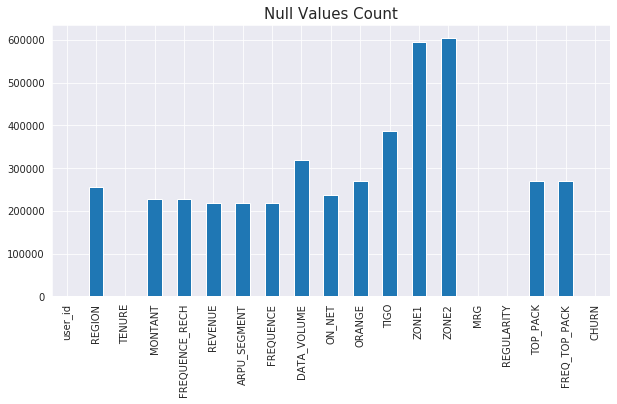

In [21]:
check_null(train)

user_id                0
REGION             44957
TENURE                 0
MONTANT            39903
FREQUENCE_RECH     39903
REVENUE            38184
ARPU_SEGMENT       38184
FREQUENCE          38184
DATA_VOLUME        55989
ON_NET             41602
ORANGE             47215
TIGO               68130
ZONE1             105027
ZONE2             106821
MRG                    0
REGULARITY             0
TOP_PACK           47613
FREQ_TOP_PACK      47613
dtype: int64


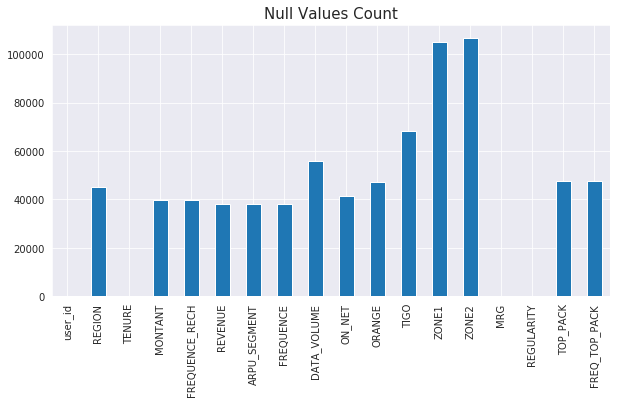

In [22]:
check_null(test)

> There are a lot of null values in the dataset

> Check for outliers

In [46]:
def check_outliers(data, show_plot=False, save_img=os.getcwd()+'/outliers.png'):
 
        """
        This functions checks for columns with outlers using the IQR method

        It accespts as argmuent a dataset. 
        show_plot can be set to True to output pairplots of outlier columns    
        """

        outliers = [] 
        Q1 = data.quantile(0.25)  
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        num_data = data.select_dtypes(include='number')
        result = dict ((((num_data < (Q1 - 1.5 * IQR)) | (num_data > (Q3 + 1.5 * IQR)))==True).any())
        #data[(data[col] >= high)|(data[col] <= low)].index
        index = data[(num_data < Q1 - 1.5 * IQR) | (num_data > Q3 + 1.5 * IQR)].index
        for k,v in result.items():
            if v == True:  
                outliers.append(k)
        if show_plot:
            outlier_pair_plot = sns.pairplot(data[outliers]);
            print(f'{result},\n\n Visualization of outlier columns')
            plt.savefig(fname=save_img, format='png')
            return  outlier_pair_plot
        else:
            return data.loc[index, outliers] 

outliers in train set

In [55]:
train_outliers = check_outliers(train, show_plot=False)

In [55]:
train_outliers

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,FREQ_TOP_PACK,CHURN
0,1000.0,1.0,990.0,330.0,1.0,97.0,1.0,NaN,NaN,NaN,NaN,1.0,0
1,NaN,NaN,NaN,NaN,NaN,223.0,NaN,NaN,NaN,NaN,NaN,NaN,0
2,700.0,5.0,1010.0,337.0,7.0,566.0,1.0,3.0,15.0,0.0,NaN,3.0,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,3000.0,3.0,2995.0,998.0,3.0,NaN,NaN,33.0,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
646209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
646210,1500.0,3.0,1500.0,500.0,3.0,NaN,28.0,53.0,NaN,NaN,NaN,2.0,0
646211,13000.0,26.0,14000.0,4667.0,26.0,NaN,2973.0,183.0,50.0,NaN,NaN,15.0,0
646212,3100.0,4.0,3033.0,1011.0,4.0,12905.0,NaN,0.0,NaN,NaN,NaN,3.0,0


> most columns in the train set contain outlier values

outliers in test set

In [57]:
test_outliers = check_outliers(test, show_plot=False) 

In [58]:
test_outliers

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,FREQ_TOP_PACK
0,10600.0,18.0,11099.0,3700.0,22.0,4004.0,60.0,123.0,19.0,NaN,NaN,9.0
1,NaN,NaN,NaN,NaN,NaN,0.0,7.0,NaN,NaN,NaN,NaN,NaN
2,17900.0,36.0,18405.0,6135.0,44.0,0.0,446.0,50.0,28.0,2.0,NaN,9.0
3,10000.0,10.0,10001.0,3334.0,27.0,NaN,0.0,93.0,8.0,NaN,NaN,12.0
4,500.0,1.0,500.0,167.0,1.0,NaN,8.0,14.0,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
114033,200.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114035,2200.0,2.0,3501.0,1167.0,4.0,7110.0,1.0,NaN,16.0,NaN,NaN,2.0
114036,9800.0,21.0,9879.0,3293.0,21.0,18651.0,37.0,0.0,NaN,NaN,NaN,15.0


> check for duplicate values

In [60]:
train.duplicated().any()

False

In [61]:
test.duplicated().any()

False

> check for class imbalance

Class Imbalance

0    524912
1    121302
Name: CHURN, dtype: int64 



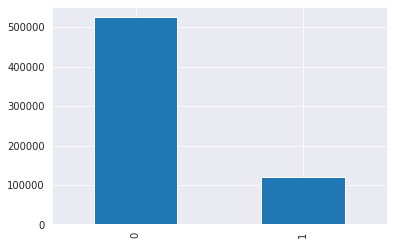

In [67]:
print("Class Imbalance\n")
print(train.CHURN.value_counts(), "\n")
train.CHURN.value_counts().plot.bar();

> no null values 

##### Data Cleaning

- Treat outliers with IsolationForest

- Treat nul vlaues in numerical featurees with KNN, and categorical features with mode

- Use Pipeline

In [ ]:
            for col in self.data.columns.tolist():
                if is_numeric_dtype(self.data[col]):
                    median = (self.data[col].quantile(0.50))
                    q1 = self.data[col].quantile(0.25)
                    q3 = self.data[col].quantile(0.75)
                    iqr = q3 - q1
                    high = int(q3 + 1.5 * iqr) 
                    low = int(q1 - 1.5 * iqr)
                    self.data[col] = np.where(self.data[col] > high, median, self.data[col])
                    self.data[col] = np.where(self.data[col] > high, median, self.data[col]) 

> mean imputation for NaN values

In [91]:
Pipeline(steps=[('Knn_impute',KNNImputer())])

False

In [96]:
# def fill_na(data):
#     for col in data.columns.tolist():
#         if data[col].isna().any():
#             data[col].fillna()
            

In [99]:
def treat_outlier(data):
    from sklearn.neighbors import LocalOutlierFactor
    iso = IsolationForest(contamination='auto')
    yhat = iso.fit_predict(data.select_dtypes(exclude='object'),) 
    print(yhat) 
    #select all rows that are not outliers
    mask = yhat != -1 
    data = data[mask] 

In [100]:
treat_outlier(train) 

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').